# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [3]:
img_1_path='/content/n02106662_14005.JPEG'
img_2_path='/content/n02106662_24480.JPEG'
img_1=cv2.imread(img_1_path)
img_2=cv2.imread(img_2_path)

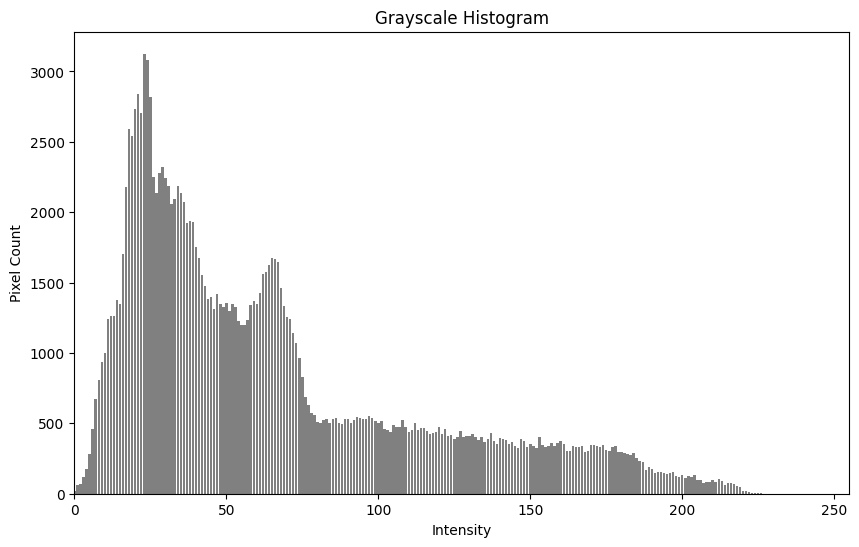

In [18]:
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=int)

    for row in range(gray_img.shape[0]):
        for col in range(gray_img.shape[1]):
            pixel_value = gray_img[row, col]
            hist[pixel_value] += 1
    return hist

gray_img = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
hist = gray_histogram(gray_img)
plt.figure(figsize=(10, 6))
plt.title('Grayscale Histogram')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')
plt.bar(range(256), hist, color='gray')
plt.xlim([0, 255])
plt.show()

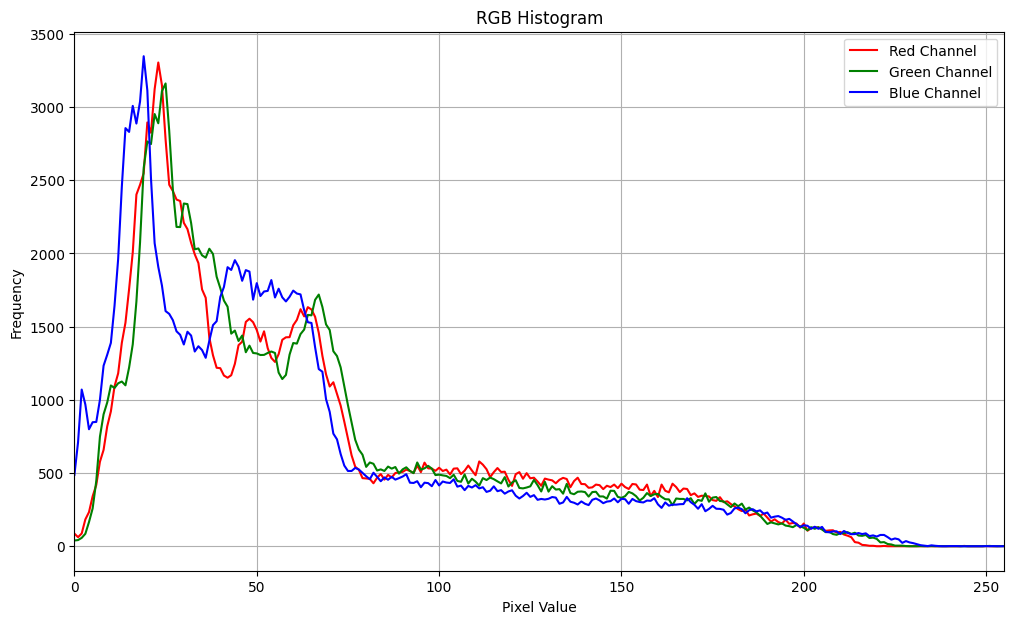

In [19]:
def rgb_histogram(rgb_img):
    histograms = []
    colors = ['red', 'green', 'blue']

    for i in range(rgb_img.shape[2]):
        hist = np.zeros(256, dtype=int) #a histogram array for each channel
        channel = rgb_img[:, :, i] # Extract the current channel

        for row in range(channel.shape[0]):
            for col in range(channel.shape[1]):
                pixel_value = channel[row, col]
                hist[pixel_value] += 1
        histograms.append(hist)
    return histograms

img_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
rgb_hists = rgb_histogram(img_rgb)
plt.figure(figsize=(12, 7))
colors = ['red', 'green', 'blue']
for i, hist in enumerate(rgb_hists):
    plt.plot(range(256), hist, color=colors[i], label=f'{colors[i].capitalize()} Channel')

plt.title('RGB Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.legend()
plt.grid(True)
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

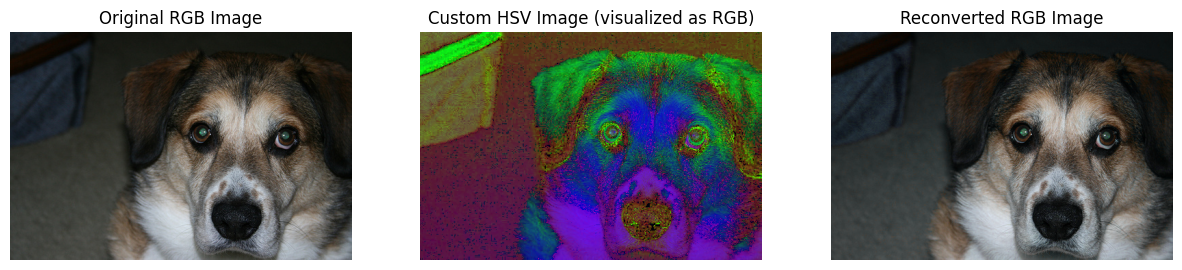

In [21]:
def rgb_to_hsv(rgb_img):
    rgb = rgb_img.astype(np.float32) / 255.0
    R, G, B = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]

    C_max = np.maximum(np.maximum(R, G), B)
    C_min = np.minimum(np.minimum(R, G), B)
    delta = C_max - C_min

    H = np.zeros_like(R)
    S = np.zeros_like(R)
    V = C_max
    S[C_max != 0] = delta[C_max != 0] / C_max[C_max != 0]

    # If delta is 0, H is 0 (grayscale)
    idx_r = (delta != 0) & (C_max == R) #if red is the maximum channel
    H[idx_r] = (60 * ((G[idx_r] - B[idx_r]) / delta[idx_r]) + 360) % 360

    idx_g = (delta != 0) & (C_max == G) #if green is the maximum channel
    H[idx_g] = (60 * ((G[idx_g] - B[idx_g]) / delta[idx_g]) + 120) % 360

    idx_b = (delta != 0) & (C_max == B) #if blue is the maximum channel
    H[idx_b] = (60 * ((G[idx_b] - B[idx_b]) / delta[idx_b]) + 240) % 360

    # OpenCV scales Hue to [0, 179]
    # Hue range is [0, 360], so scaling to [0, 179] for 0-255 output
    H = H / 2

    # Scale S and V to [0, 255]
    S = S * 255
    V = V * 255
    hsv_img = np.stack([H, S, V], axis=-1).astype(np.uint8)
    return hsv_img

img_rgb_original = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_hsv_custom = rgb_to_hsv(img_rgb_original)
img_rgb_reconverted = cv2.cvtColor(img_hsv_custom, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb_original)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_hsv_custom)
plt.title('Custom HSV Image (visualized as RGB)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_rgb_reconverted)
plt.title('Reconverted RGB Image')
plt.axis('off')

plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

/tmp/ipython-input-3662149326.py:28: RuntimeWarning: invalid value encountered in power
  rgb = 255 * ((rgb / 255) ** (1 / gamma))
/tmp/ipython-input-3662149326.py:31: RuntimeWarning: invalid value encountered in cast
  rgb = np.clip(rgb, 0, 255).astype(np.uint8)


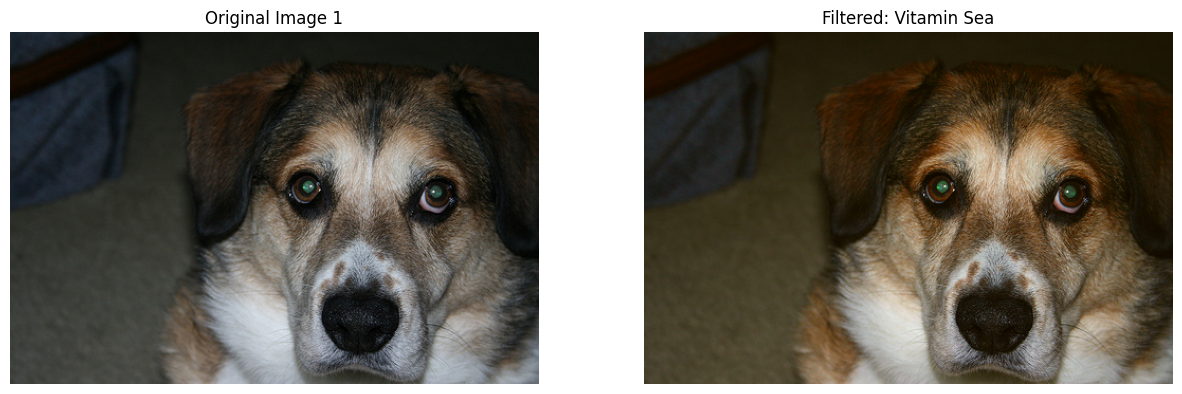

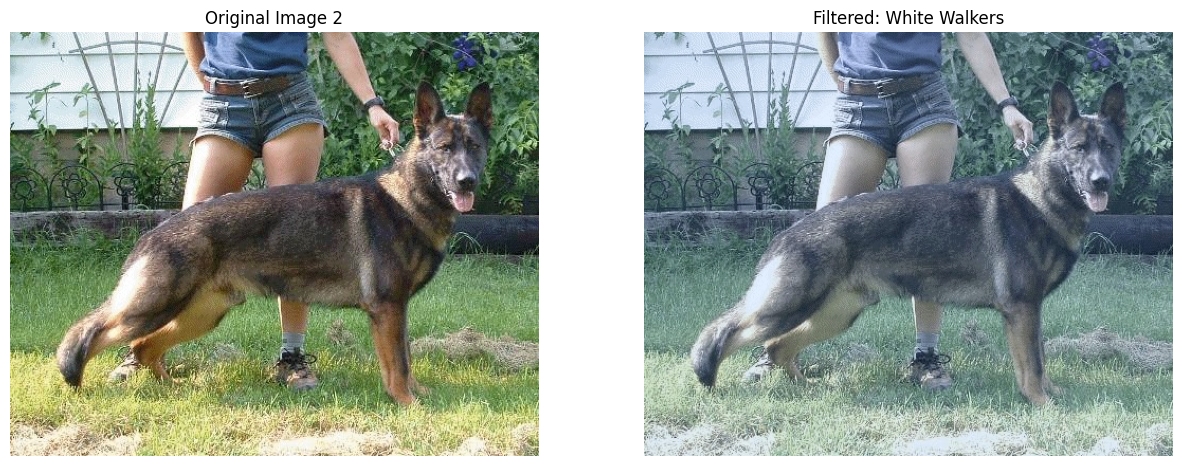

In [42]:
# Filter 1: "VITAMIN SEA"
# Boosts saturation : makes colors pop like tropical photos
# Applies warm orange tint : sunny/beach-like effect
# Light gamma correction : brightens midtones

# Good for: Beach photos, sunset images, landscapes with greenery
# These modifications enhance warm tones, making the image feel vibrant and tropical.
# They suit sunside beach images cause such scenes naturally benefit from brighter colors and warmth.

def tropical_punch(img):

    # Converting RGB to HSV for saturation boost
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)

    # SATURATION BOOST
    hsv[:,:,1] *= 1.35     # Increase saturation by 35%
    hsv[:,:,1] = np.clip(hsv[:,:,1], 0, 255)

    # Convert back to RGB
    rgb = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)

    # WARM ORANGE TINT
    warm_tint = np.array([20, 10, -5], dtype=np.float32)  # increasing R & G and slightly reducing B to give a warm orange look,
    rgb += warm_tint                                      # giving a sunny tropical effect

    # GAMMA CORRECTION
    gamma = 0.9   # <1 : brightens
    rgb = 255 * ((rgb / 255) ** (1 / gamma))

    # Clip + convert back
    rgb = np.clip(rgb, 0, 255).astype(np.uint8)
    return rgb

# Filter 2: "White Walkers"
# Reduces saturation → colder, muted mood
# Shifts hue slightly toward blue
# Applies blue-cyan cool tint
# Low-contrast curve → winter/fog effect

# Good for: Snow scenes, rainy images, moody portraits, night city shots.
# These changes suppress warm tones and highlight blues, giving the image a winter or rainy atmosphere.
# They suit snowy, cloudy, or nighttime images where a softer, cooler look feels natural.

def winter_is_coming(img):

    # Convert RGB → HSV for saturation + hue edits
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)

    # REDUCE SATURATION
    hsv[:,:,1] *= 0.55   # lowers color intensity, make colors colder + muted

    #  COOL HUE SHIFT
    hsv[:,:,0] += 5      # slight shift toward cyan/blue
    hsv[:,:,0] %= 180    # % 180 keeps hue values within valid range

    rgb = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)

    # BLUE-CYAN COOL
    # Slightly reduce Red (−10)
    # Slightly increase Green (+5)
    # Increase Blue(+25)
    cool_tint = np.array([-10, 5, 25], dtype=np.float32) # this somewhat gives a strong cold atmosphere
    rgb += cool_tint

    # LOW CONTRAST
    rgb = (rgb - 127) * 0.85 + 127    # Contrast curve around midpoint
    # Clip back to 0–255
    rgb = np.clip(rgb, 0, 255).astype(np.uint8)
    return rgb

# Using img_1 (original RGB) for "Tropical Punch"
img_rgb_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
filtered_img_1 = tropical_punch(img_rgb_1)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_1)
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img_1)
plt.title('Filtered: Vitamin Sea')
plt.axis('off')
plt.show()

# Using img_2 (original RGB) for "White Walkers"
img_rgb_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
filtered_img_2 = winter_is_coming(img_rgb_2)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_2)
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img_2)
plt.title('Filtered: White Walkers')
plt.axis('off')
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

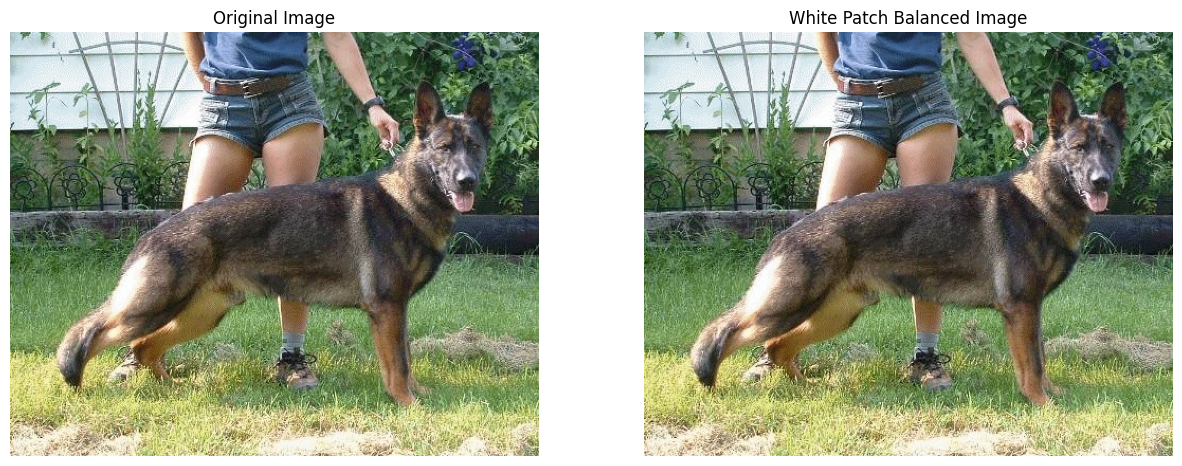

In [22]:
def white_patch_balance(img_rgb):
    img = img_rgb.astype(np.float32)

    max_r = np.max(img[:, :, 0])
    max_g = np.max(img[:, :, 1])
    max_b = np.max(img[:, :, 2])

    overall_max = 255.0 # We want to scale to 255
    scale_r = overall_max / max_r
    scale_g = overall_max / max_g
    scale_b = overall_max / max_b

    balanced_img = np.zeros_like(img)
    balanced_img[:, :, 0] = img[:, :, 0] * scale_r
    balanced_img[:, :, 1] = img[:, :, 1] * scale_g
    balanced_img[:, :, 2] = img[:, :, 2] * scale_b
    return np.clip(balanced_img, 0, 255).astype(np.uint8)

img_rgb_original_d = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
balanced_img = white_patch_balance(img_rgb_original_d)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb_original_d)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(balanced_img)
plt.title('White Patch Balanced Image')
plt.axis('off')

plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

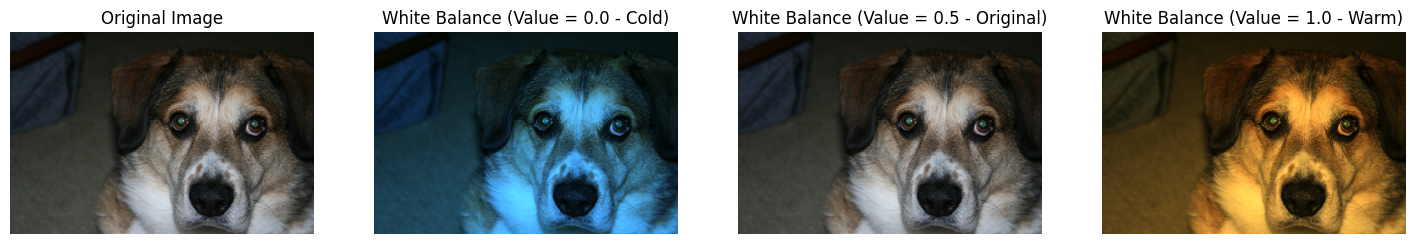

In [29]:
def white_balance(img_rgb, value):
    img = img_rgb.astype(np.float32) / 255.0

    # Cold adjustment (value < 0.5): Decrease red, increase blue
    # Warm adjustment (value > 0.5): Increase red, decrease blue
    if value < 0.5:
        coldness_factor = 1 - (value * 2)
        # Reduce red channel
        img[:, :, 0] = img[:, :, 0] * (1 - 0.55 * coldness_factor)
        # Increase blue channel
        img[:, :, 2] = img[:, :, 2] * (1 + 0.4 * coldness_factor)
    elif value > 0.5:
        warmth_factor = (value - 0.5) * 2
        # Increase red channel
        img[:, :, 0] = img[:, :, 0] * (1 + 0.4 * warmth_factor)
        # Reduce blue channel
        img[:, :, 2] = img[:, :, 2] * (1 - 0.6 * warmth_factor)
    return np.clip(img * 255, 0, 255).astype(np.uint8)

#To fine-tune the intensity of the cold and warm effects we can change the percentage coefficients in the lines that modify
#the Red and Blue channels. The 0.5 values determine the maximum percentage change applied to the channels when
#coldness_factor or warmth_factor are at their maximum (i.e., when value is 0 or 1).
img_rgb_3 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

img_cold = white_balance(img_rgb_3, 0.0) # Coldest
img_original = white_balance(img_rgb_3, 0.5) # Original
img_warm = white_balance(img_rgb_3, 1.0) # Warmest

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb_3)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_cold)
plt.title('White Balance (Value = 0.0 - Cold)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_original)
plt.title('White Balance (Value = 0.5 - Original)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_warm)
plt.title('White Balance (Value = 1.0 - Warm)')
plt.axis('off')

plt.show()

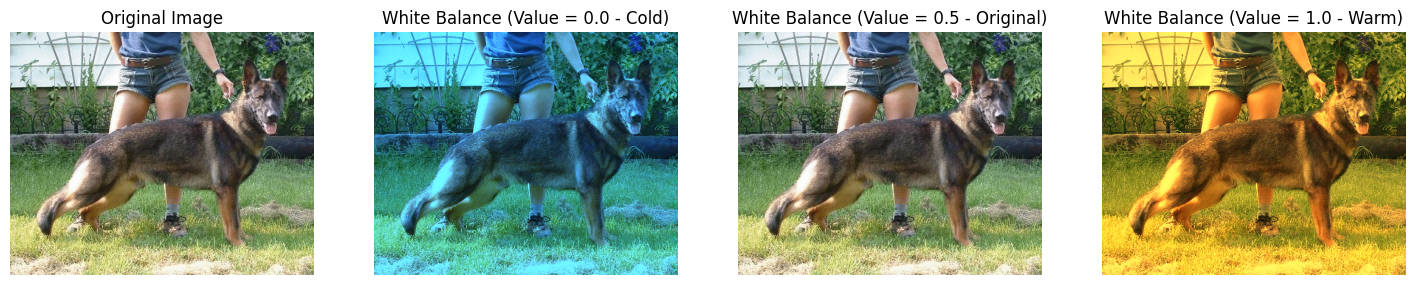

In [30]:
img_rgb_3 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

img_cold = white_balance(img_rgb_3, 0.0) # Coldest
img_original = white_balance(img_rgb_3, 0.5) # Original
img_warm = white_balance(img_rgb_3, 1.0) # Warmest

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb_3)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_cold)
plt.title('White Balance (Value = 0.0 - Cold)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_original)
plt.title('White Balance (Value = 0.5 - Original)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_warm)
plt.title('White Balance (Value = 1.0 - Warm)')
plt.axis('off')

plt.show()